# MNIST NNs

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalisation
X_train = X_train / 255
X_test = X_test / 255

def createY(y):
    Y = np.zeros(10)
    Y[y] = 1
    return Y

# reshape
X_train = X_train.reshape(60000, 28 ** 2)
X_test = X_test.reshape(10000, 28 ** 2)
y_train = np.array([createY(y) for y in y_train])
y_test =np.array([createY(y) for y in y_test])

# tensorflow
# X_train = tf.Variable(X_train, dtype=tf.float64)
# X_test = tf.Variable(X_test, dtype=tf.float64)
# y_train = tf.Variable(y_train, dtype=tf.float64)
# y_test = tf.Variable(y_test, dtype=tf.float64)

## Initialize HyperParameters

In [72]:
def inistial_parameters(n, dims):
    
    W = {}
    B = {}
    
    for i in range(len(dims)):
        dim = dims[i]
        if i == 0:
            w =  np.random.randn(n, dim) * 1e-2
            W['W' + str(i + 1)] = w
            b = np.random.randn(1) * 1e-2
            B['b' + str(i + 1)] = b
        else:
            w = np.random.randn(dims[i-1], dim) * 1e-2
            W['W' + str(i + 1)] = w
            b = np.random.randn(1) * 1e-2
            B['b' + str(i + 1)] = b
            
    return {
        'W' : W,
        'b' : B
    }

#debug
# test_n = X_train.shape[1]
# test_dims = [100, 100, 100, 200]
# test_parameters = inistial_parameters(n, dims)
# test_parameters['b']

## Linear Regression

In [73]:
def linear(X, W, b):
    return np.dot(X, W) + b

# debug
# linear(np.random.randn(4, 3), tf.Variable(np.random.randn(3, 1), dtype=tf.float32), 1)

## ReLU

In [74]:
def relu(X):
    return np.maximum(X, 0)

## Sigmoid

In [75]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

## Softmax

In [76]:
def softmax(X):
    return (np.exp(X)) / (np.sum(np.exp(X)))

## Activation function

In [77]:
def activation(A_prev, W, b, active):
    """
    activation - sigmoid/relu/softmax
    """
    
    if active == 'sigmoid':
        Z = linear(A_prev, W, b)
        A = sigmoid(Z)
    elif active == 'relu':
        Z = linear(A_prev, W, b)
        A = relu(Z)
    elif active == 'softmax':
        Z = linear(A_prev, W, b)
        A = softmax(Z)
        
    return A

## L model forward

In [78]:
def L_model_forward(X, W, b):
    A = X
    L = len(b)
    caches = {}
    
    for i in range(1, L):
        A_prev = A
        
        A = activation(A_prev, W['W' + str(i)], b['b' + str(i)], 'relu')
        caches['A' + str(i)] = A
        
    AL = activation(A, W['W' + str(L)], b['b' + str(L)], 'softmax')
    
    return (AL, caches)

# debug
# test = L_model_forward(X_test, W, b)
# print(test[0])

## Cross entropy error function for softmax

In [79]:
def crossEntropyError(AL, y):
    m = AL.shape[0]
    cost = - (1 / m) * (np.sum(y * np.log(AL), axis=0))
    return cost

## Softmax derivative

In [80]:
def softmax_derivative():
    pass

## ReLU derivative

In [157]:
def relu_derivative(dA):
    _dA = dA.copy()
    _dA[_dA < 0] = 0
    _dA[_dA > 0] = 1
    return _dA

## Linear derivative

$$g'(u) = g(u) .* (1 - g(u))$$

In [82]:
def linear_derivative(Z):
    g_derivative = Z * (1 - Z)
    return g_derivative

## Initial parameters

In [270]:
n = X_train.shape[1]
dims = [100, 10]
parameters = inistial_parameters(n, dims)
W = parameters['W']
b = parameters['b']
alpha = 1e-4

In [271]:
single_X = X_test[0]
single_y = y_test[0]

single_X = single_X.reshape(1, X_test.shape[1])

m = single_X.shape[0]

costs = []

for i in range(100):
    AL, caches = L_model_forward(single_X, W, b)

    J_L = crossEntropyError(AL, single_y)

    W_L = W['W' + str(2)]

    softmax_derivative = AL - single_y
    
    costs.append(np.sum(single_y - AL) ** 2)

    dW_L = (1 / m) * np.dot(caches['A1'].T, softmax_derivative)

    db_L = (1 / m) * np.sum(softmax_derivative, axis=1, keepdims=True)

    _relu_derivative = relu_derivative(caches['A1'])

    dZ_1 = np.dot(softmax_derivative, W_L.T) * _relu_derivative

    dW_1 = (1 / m) * np.dot(single_X.T, dZ_1)

    db_1 = (1 / m) * np.sum(dZ_1, axis=1, keepdims=True)

    W['W1'] = W['W1'] - alpha * dW_1
    b['b1'] = b['b1'] - alpha * db_1
    W['W2'] = W['W2'] - alpha * dW_L
    b['b2'] = b['b2'] - alpha * db_L
    

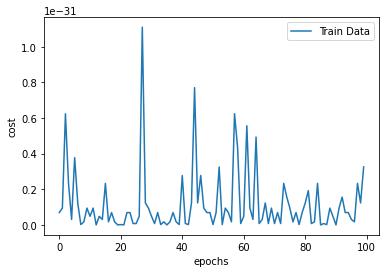

In [272]:
import matplotlib.pyplot as plt

plt.plot(costs, label="Train Data")
# plt.plot(J_devs[1000:], label="Validation Data")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()



## Backward

In [20]:
def backward(AL, Y):
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    print(dAL[0])
    
backward(AL, y_test)

[-711595.31265493 -689160.75306898 -708842.49554957 -687789.60029629
 -700757.6536571  -693846.85316414 -702292.82172862 -696198.75393028
 -707889.85815196 -700211.83504907]
